LINK DEPLOYMENT : https://huggingface.co/spaces/Iqbaljanitra/DeathEvent/tree/main

# P1GC3

NAME : IQBAL JANITRA

BATCH : 003

In [114]:
pandas.__version__

NameError: name 'pandas' is not defined

# IMPORT LIBRARIES

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# PROBLEM STATEMENT

Create a Classification model using Random Forest and one of the boosting algorithms to predict whether a patient will die or not using the dataset you have obtained. but first we need to get a data, we use `Google Clound Platform` and to get the data here is the Quries we did.

### SQL QUERIES

In [49]:
#select CAST (age as FLOAT64) as age,
       #CAST (anaemia as INT64) as anaemia,
       #CAST (creatinine_phosphokinase as INT64) as creatinine_phosphokinase,
       #CAST (diabetes as INT64) as diabetes,
       #CAST (ejection_fraction as INT64) as ejection_fraction,
       #CAST (high_blood_pressure as INT64) as high_blood_pressure,
       #CAST (platelets as FLOAT64) as platelets,
       #CAST (serum_creatinine as FLOAT64) as serum_creatinine,
       #CAST (serum_sodium as INT64) as serum_sodium,
       #CAST (sex as INT64) as sex,
       #CAST (smoking as INT64) as smoking,
       #CAST (time as INT64) as time,
       #CAST (DEATH_EVENT as INT64) as death_event
#from `ftds-hacktiv8-project.phase1_ftds_003_hck.heart-failure`

# DATA LOADING

In [50]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/PHASE 2/GC/GC 3/h8dsft_P1GC3_Iqbal_janitra_data.csv")

show the rows and coloumns 

In [51]:
df.shape

(299, 13)

The first 10 rows.

In [52]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


The last 10 Rows

In [53]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


CHecking the info of coloumns and data type

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Counting unique value.

In [55]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
death_event                   2
dtype: int64

# DATA CLEANING

### Handing Duplicated Data

On case we need to find any duplicates data, and handling it. we can see there are no any duplicated.

In [109]:
df.duplicated().value_counts()

False    299
dtype: int64

### Handling Missing Value

And there are no missing value.

In [110]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

# Exploratory Data Analysis (EDA)

And the first step we need to do for find the best feature selection, we need to `Exploratory Data Analysis (EDA)` for make a mode to predictic `death event`

Making Pairplot, to show correlation on death_event with every coloumns

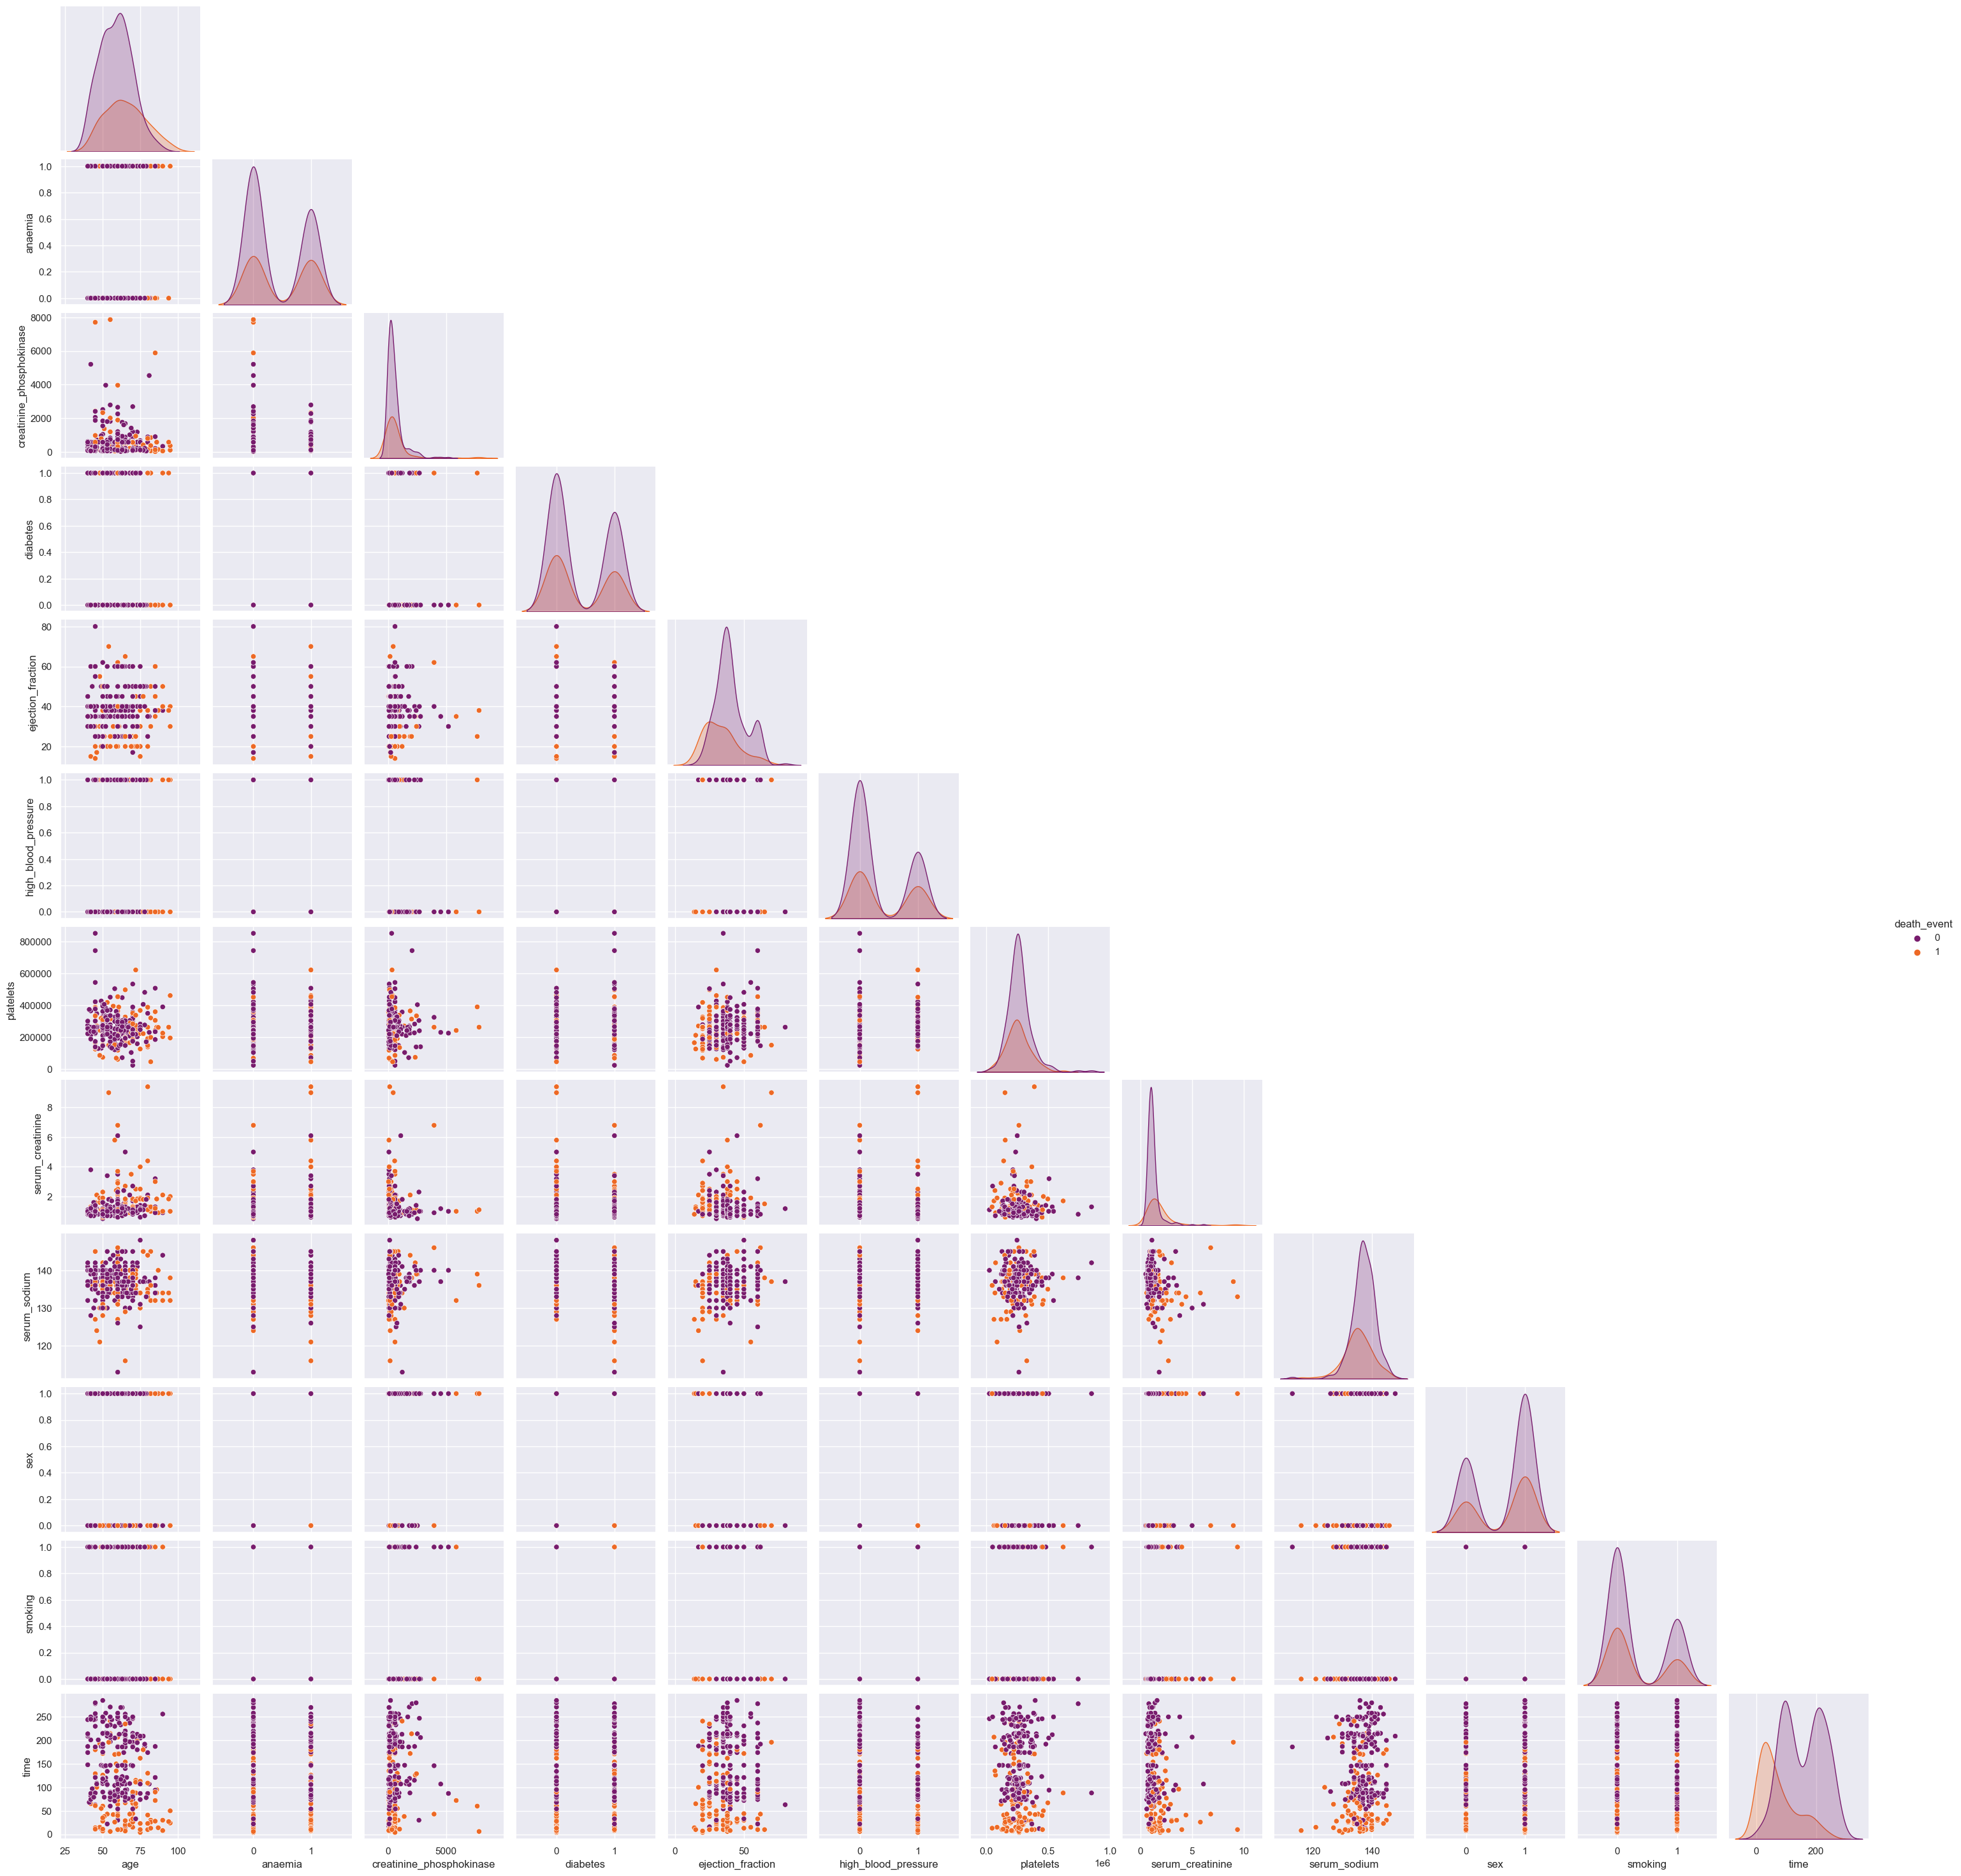

In [56]:
sns.pairplot(df, hue="death_event", palette="inferno", corner=True);

Making heatmap, to show correlation on death_event with every coloumns

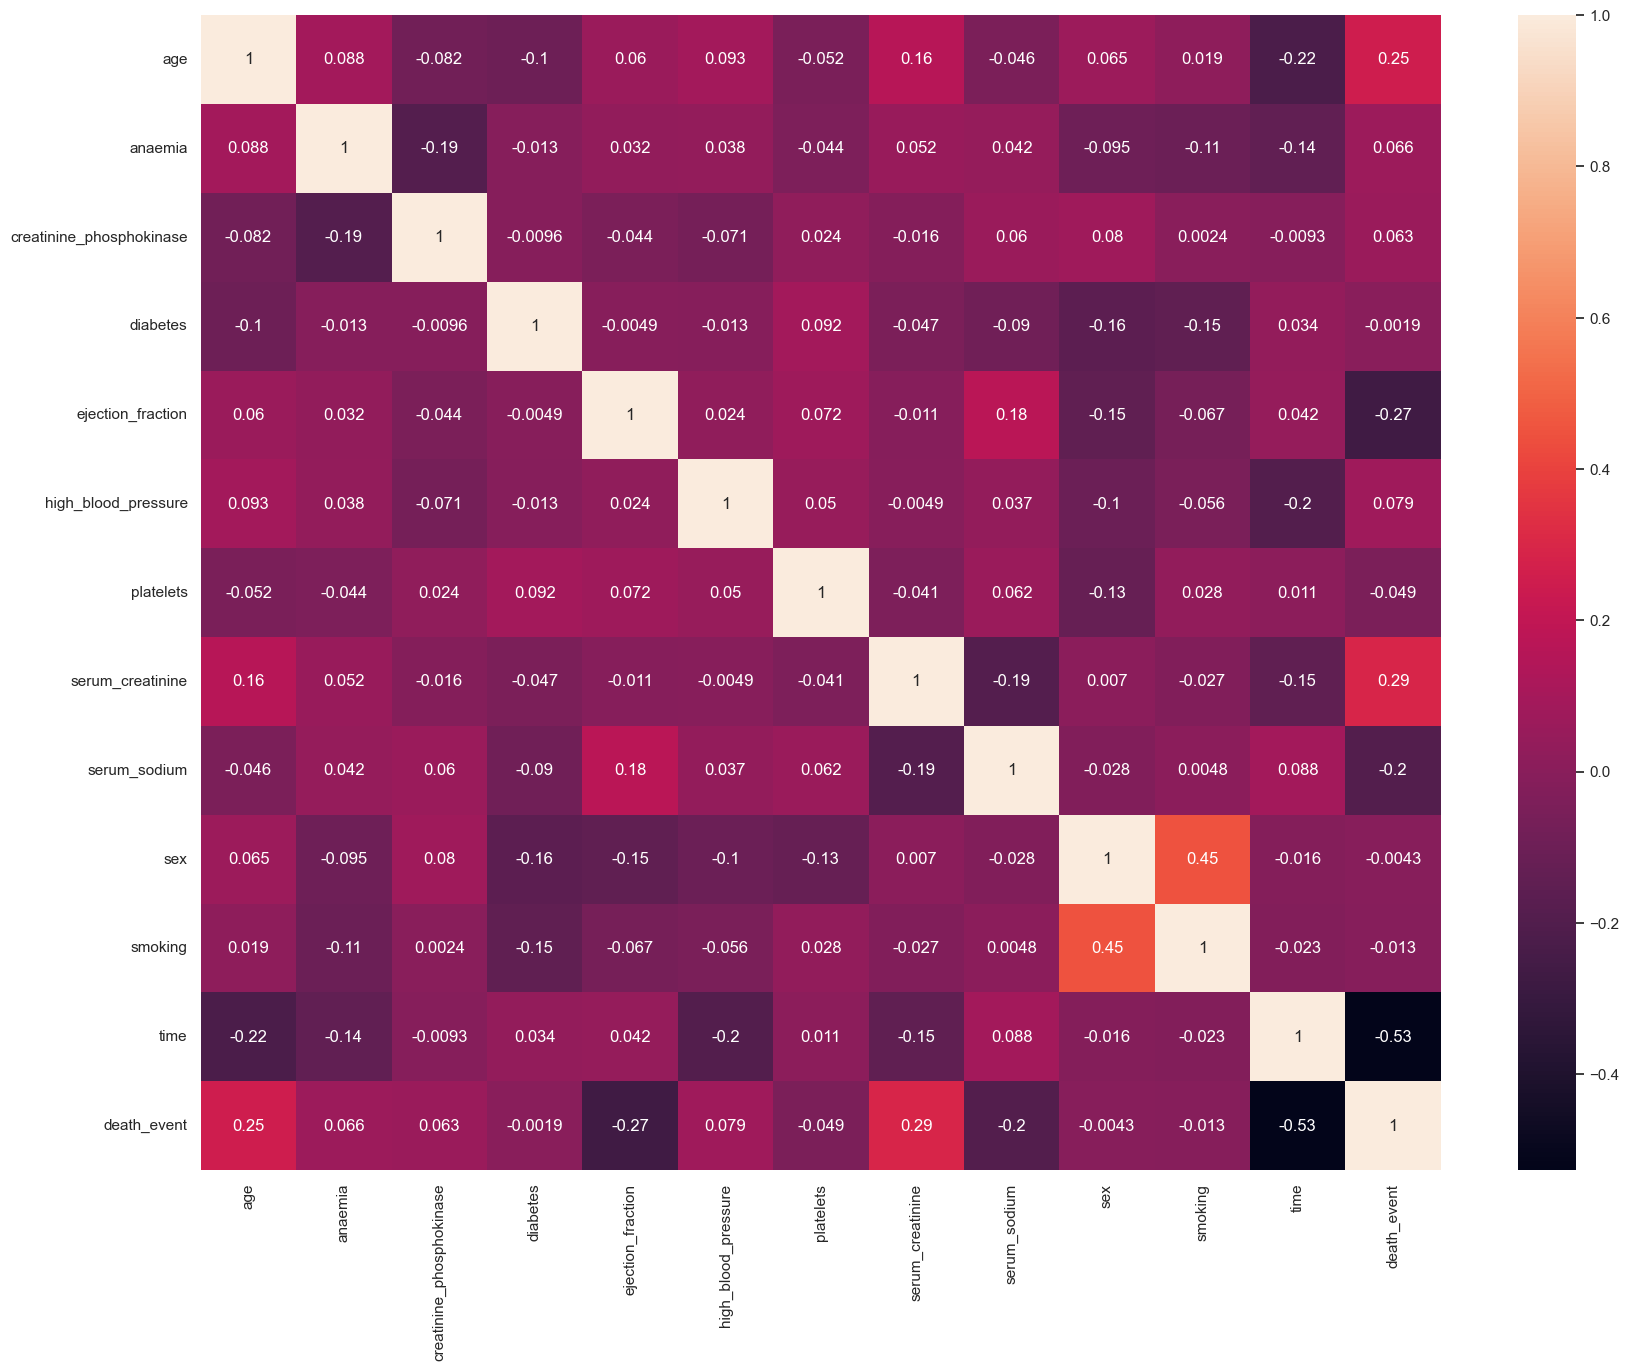

In [57]:
fig,ax = plt.subplots(figsize=[20,15])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

### Death Event

0 = Alive

1 = Death

From the data we can see, there are 203 alive data, and 96 death data

In [58]:
df['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

And this is the visualization from 203 alive the value in percent is 67.9% and 96 death 32%.

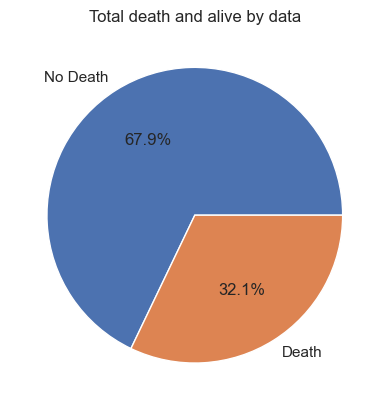

In [59]:
#making variable by death_event and calculate the percentages
death_counts = df.death_event.value_counts()
death_ratios = death_counts / df.shape[0]

plt.pie(death_ratios, labels=['No Death','Death'], autopct='%1.1f%%')
plt.title("Total death and alive by data")
plt.show()

### Serum Creatinine	


Serum creatinine is a waste product that is produced by the muscles and eliminated from the body by the kidneys. It is measured in the blood to assess kidney function. Creatinine is produced at a constant rate, making the creatinine blood test a good marker of the overall function of the kidneys. A creatinine test is used to monitor kidney function in people with chronic kidney disease, and to detect and diagnose early kidney damage. It is also used to monitor patients with conditions that may affect kidney function, such as diabetes and hypertension, as well as to check for potential side effects from certain medications. The normal range of serum creatinine is `0.5-1.3 mg/dL for men` and `0.5-1.2 mg/dL for women`. Elevated levels of creatinine indicate decreased kidney function or kidney disease.

And this one is is finding how impact `Serum Creatinine` can cause death on `death_event`. for the result of the plot we make based on the data there are so many people with 1 or higher `Serum Creatinine` have been death already.

Text(0.5, 1.0, 'Limit Balance based on Marital_status')

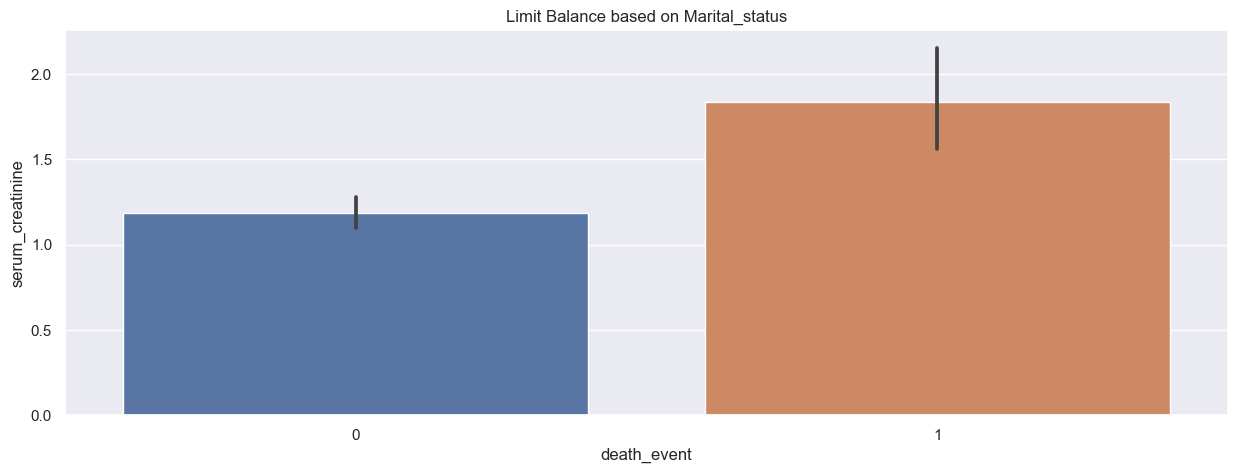

In [60]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['death_event'],y=df['serum_creatinine'])
plt.title('Limit Balance based on Marital_status')

### Smoking on every gender and age

The 2 charts illustrates the proportion of smokers among `males` and `females`, clearly showing that the `majority` of smokers are `males`. The second plot, showing the distribution of `smokers` among different `age groups`, also supports this trend, indicating that smoking is prevalent across all age groups.

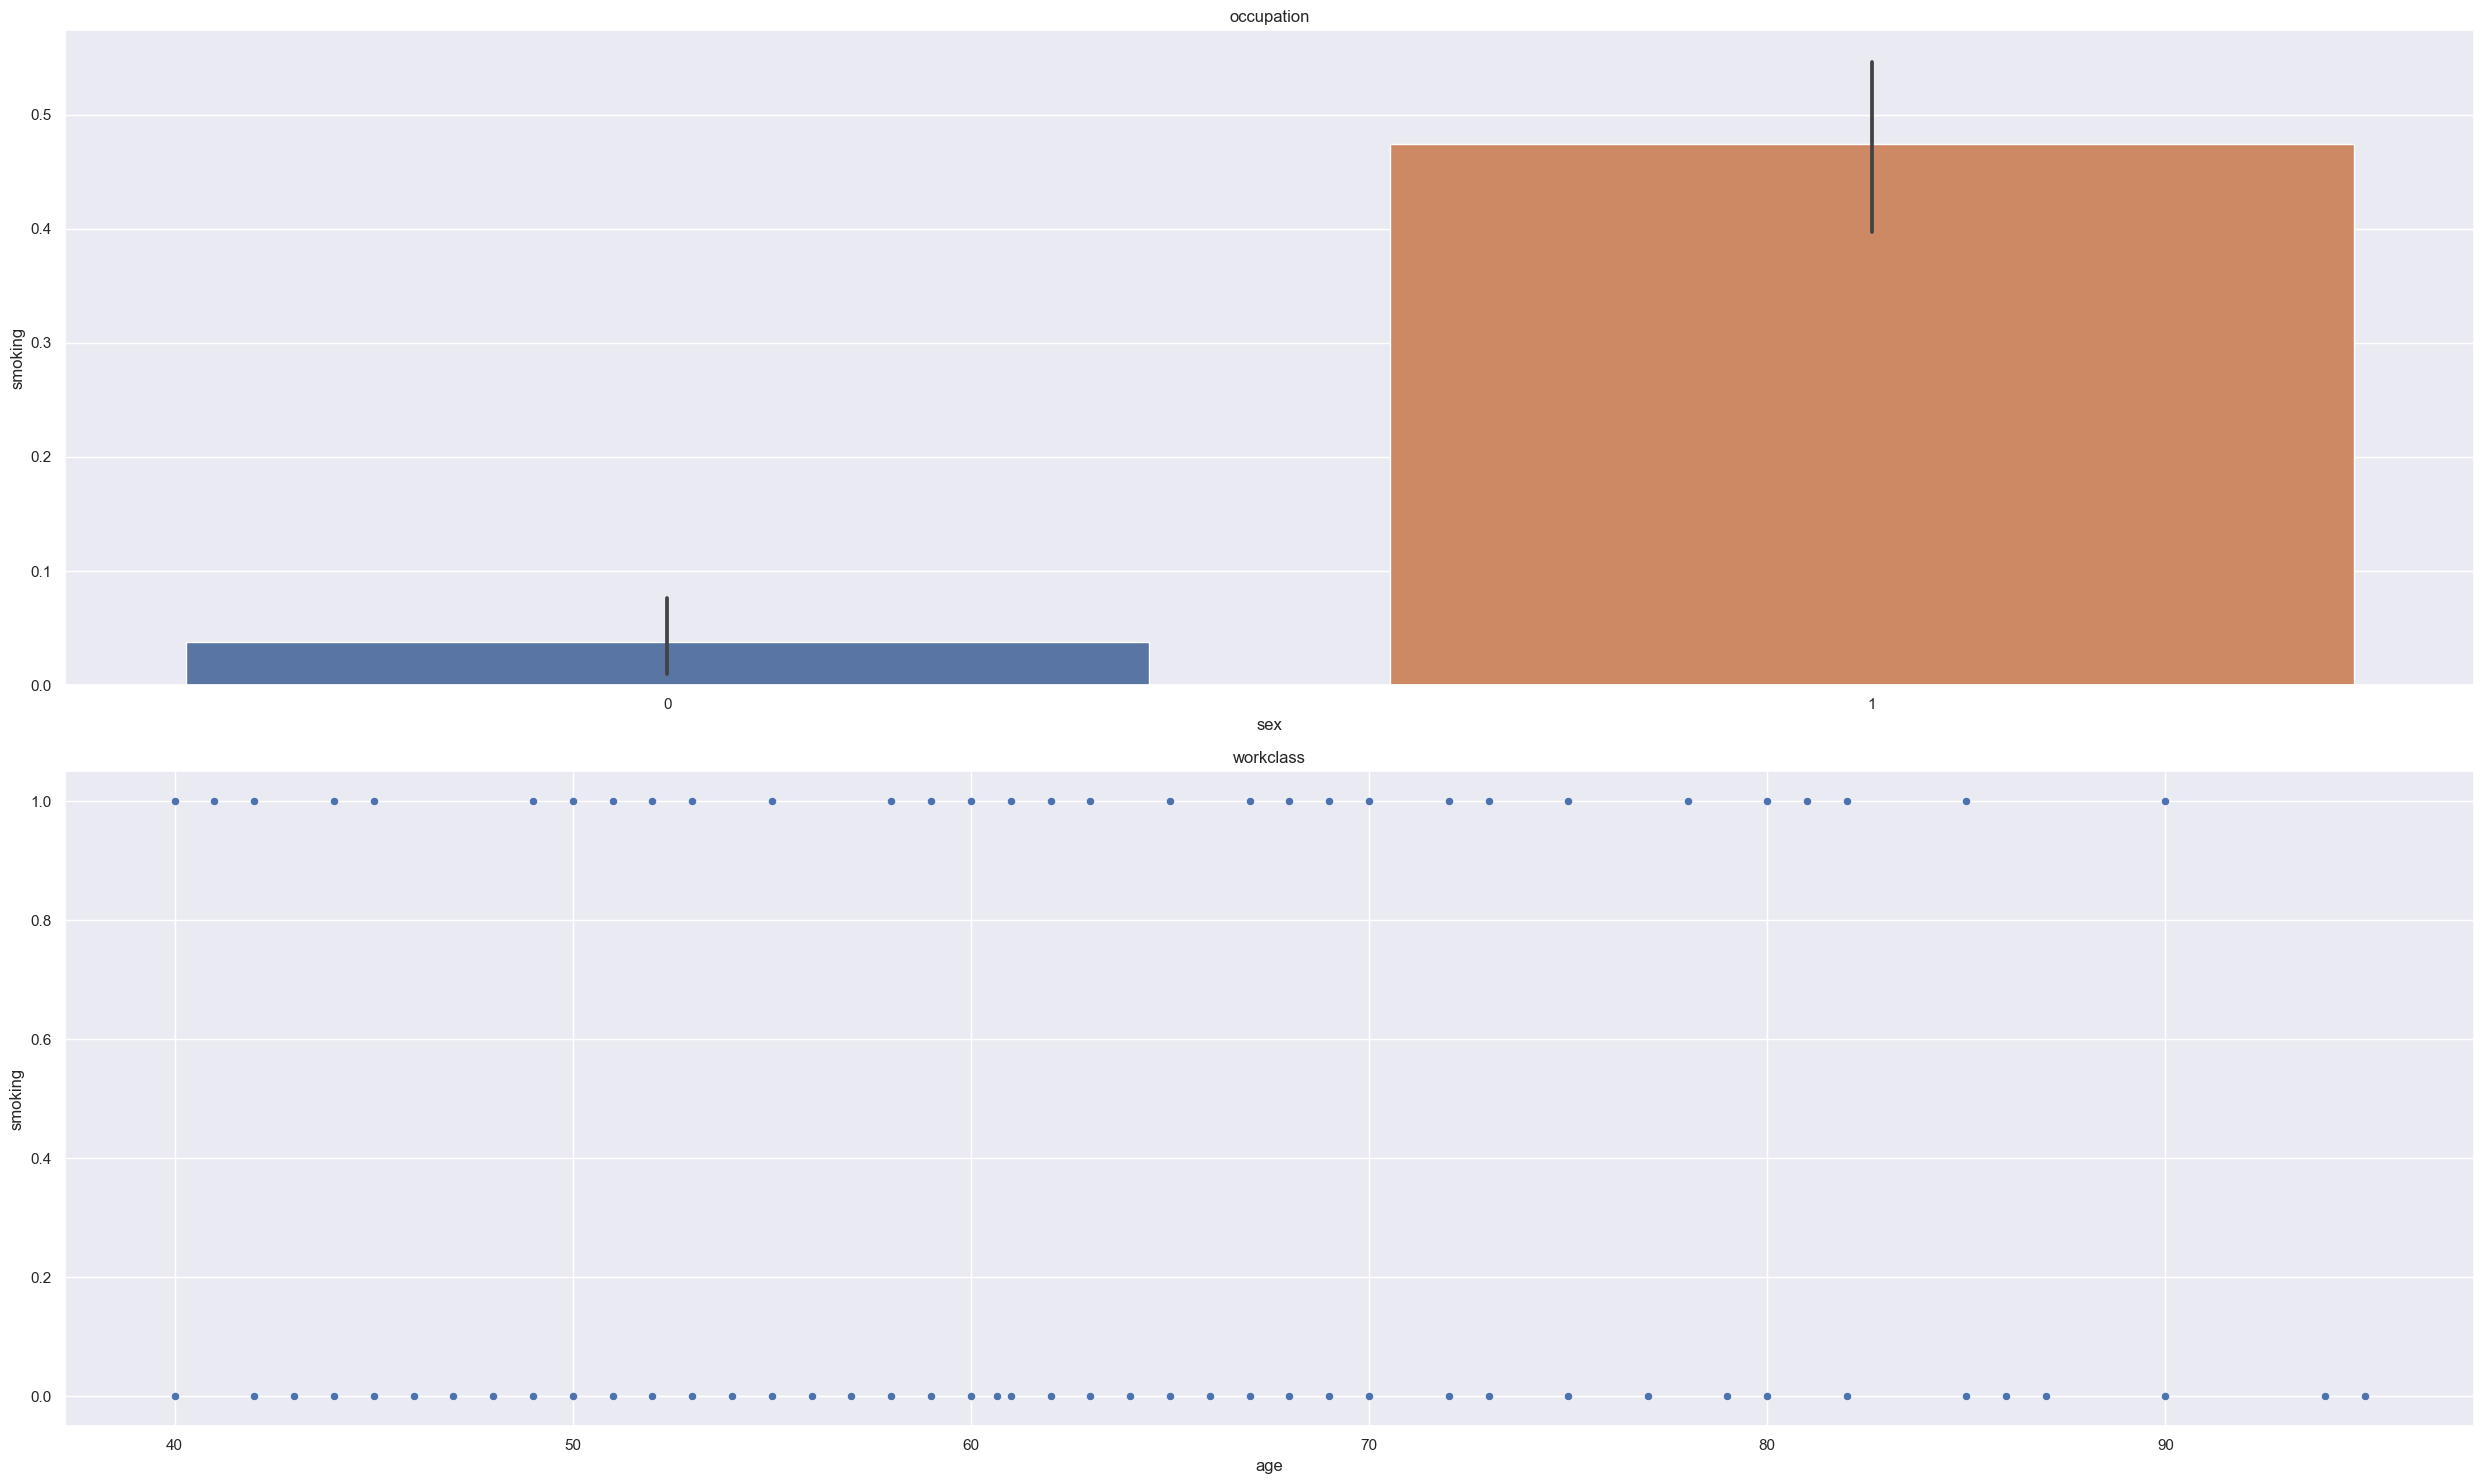

In [61]:

#Plot between income bracket per capital gain
fig, axes = plt.subplots(nrows = 2, figsize = (25, 15))
sns.set_theme()
sns.barplot(x=df['sex'],y=df['smoking'], ax=axes[0])
axes[0].set_title('occupation')

#Plot between income bracket per capital losss
sns.scatterplot(x=df['age'],y=df['smoking'], ax=axes[1])
axes[1].set_title('workclass')
plt.tight_layout()

This pie is include :

`0,0` = no smoking and alive

`0,1` = no smoking but death

`1,0` = smoking but alive

`1,1` = smoking but death

we can see from the pie plot if smoking is not really impacted to the death or alive, there are more importan than smoking. but we can see the value on `0,0` got the highest value which mean there are 45.82% data of people are still alive.



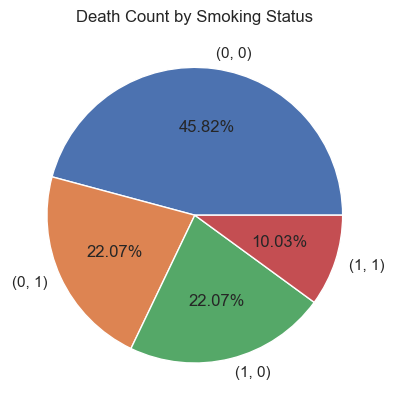

In [62]:
# group data by smoking column and count death events
death_count = df.groupby('smoking')['death_event'].value_counts()
#  Making Pie plot
sns.set_theme()
plt.pie(death_count, autopct='%.2f%%', labels=death_count.index)
plt.title('Death Count by Smoking Status')
plt.show()

Mortality Rate by Age can be used to identify and describe the degree of public health by looking at the highest mortality in age groups, to compare public health levels in various regions and is a component for calculating life expectancy.
and this lineplot showing  the older people have a bigger chance of death.

Text(0.5, 1.0, 'Limit Balance based on Marital_status')

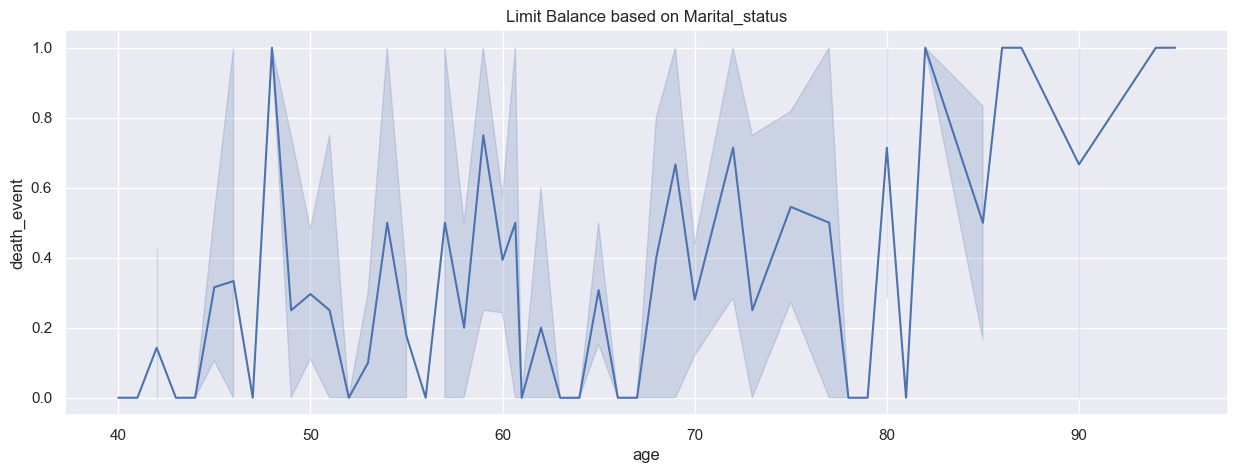

In [63]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.lineplot(x=df['age'],y=df['death_event'])
plt.title('Limit Balance based on Marital_status')

Text(0.5, 1.0, 'Death Event by age and sex')

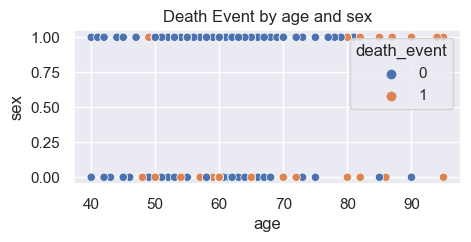

In [108]:
plt.figure(figsize=(5, 2))
sns.set_theme()
sns.scatterplot(x=df['age'],y=df['sex'],hue=df['death_event'])
plt.title('Death Event by age and sex')

### anaemia 

A condition in which the blood doesn't have enough healthy red blood cells.
Anaemia results from a lack of red blood cells or dysfunctional red blood cells in the body. This leads to reduced oxygen flow to the body's organs.
Symptoms may include fatigue, skin pallor, shortness of breath, light-headedness, dizziness or a fast heartbeat.
And there 2 type based on data

0 = Alive

1 = Death

And based on data visualization, the change getting death is higher if we get anaemia. because based on the data shows death event because anaemia is complety high.

Text(0.5, 1.0, 'Total death on anaemia')

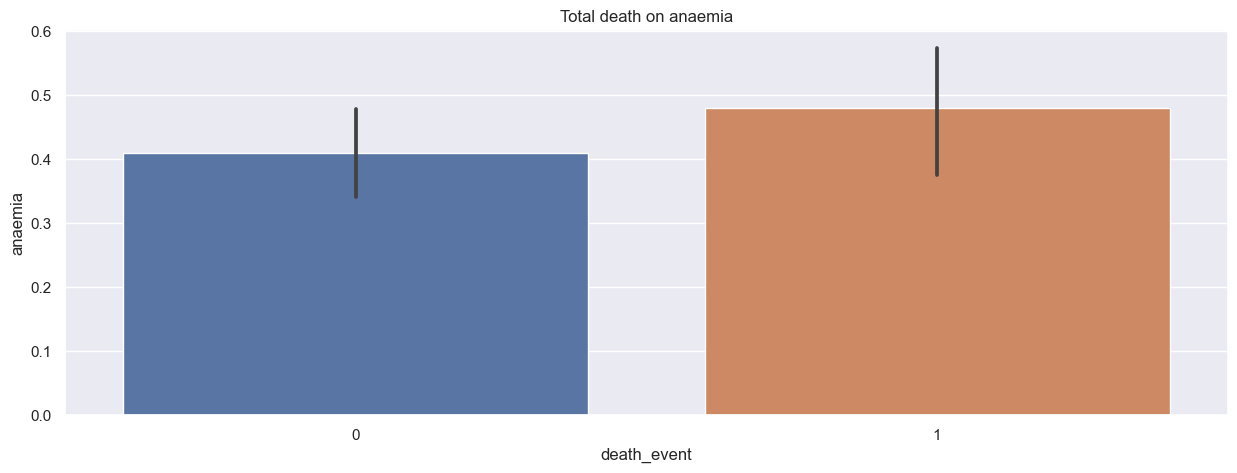

In [102]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['death_event'],y=df['anaemia'])
plt.title('Total death on anaemia')

### Creatinine Phosphokinase

Creatine kinase, also known as creatine phosphokinase or phosphocreatine kinase, is an enzyme expressed by various tissues and cell types. CK catalyses the conversion of creatine and uses adenosine triphosphate to create phosphocreatine and adenosine diphosphate.

and from visualization we can see people have creatinine phossphokinase have the chance more than 50% based on data because  it show tha death chance is higher than alive.

Text(0.5, 1.0, 'total death by creatinine phosphokinase')

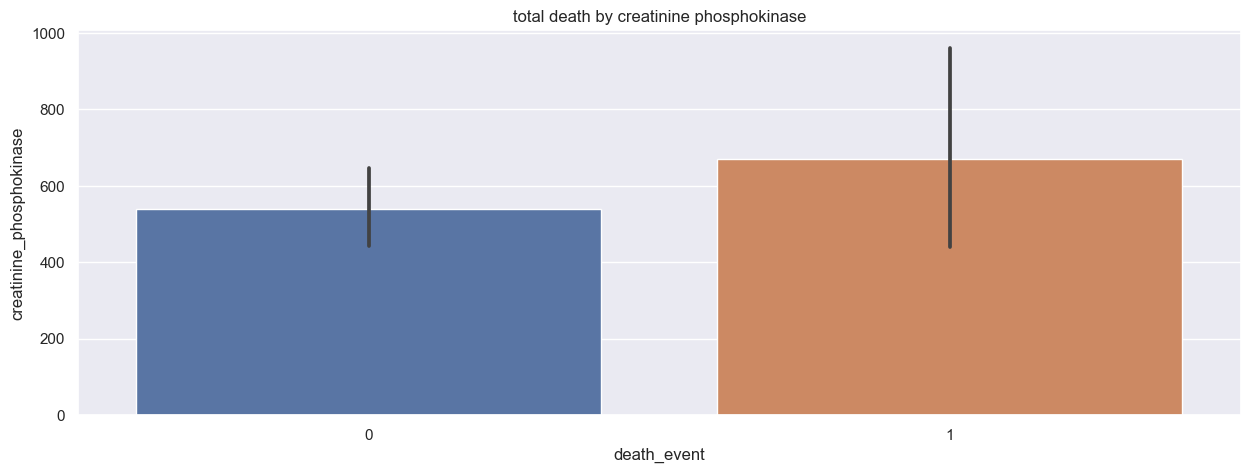

In [101]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['death_event'],y=df['creatinine_phosphokinase'])
plt.title('total death by creatinine phosphokinase')

### High Blood Pressure

High blood pressure, also known as hypertension, is a condition in which the force of the blood against the walls of the arteries is too high. Blood pressure is measured in millimeters of mercury (mmHg) and is recorded as two numbers, systolic (the higher number) and diastolic (the lower number). A normal blood pressure reading is around 120/80 mmHg. A reading of 140/90 mmHg or higher is considered high blood pressure.



Text(0.5, 1.0, 'total death by creatinine phosphokinase')

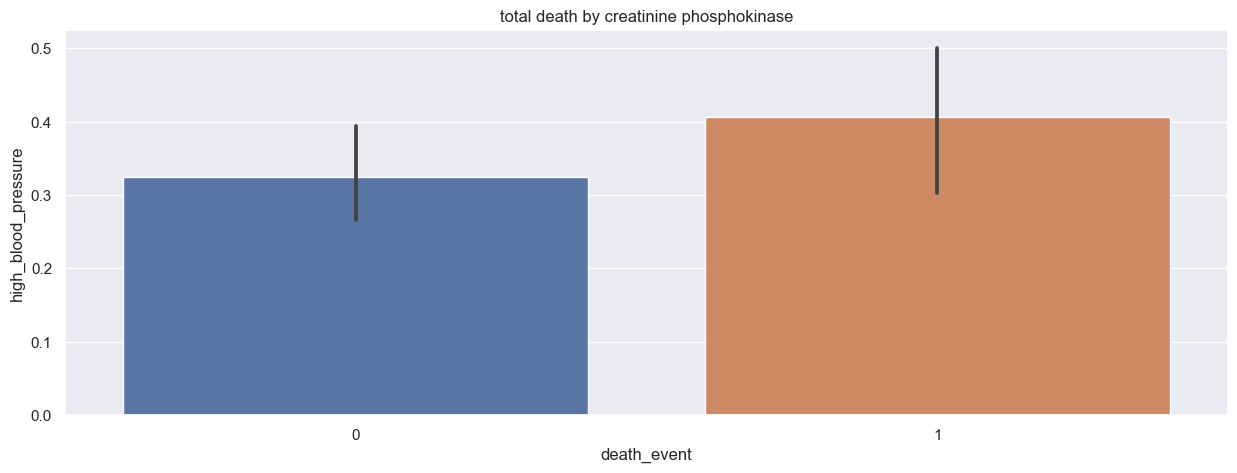

In [107]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['death_event'],y=df['high_blood_pressure'])
plt.title('total death by creatinine phosphokinase')

# FEATURES ENGINEERING

### Split between `X` (Features) and `y` (Target), and split between Train-Set and Test-Set.

In [66]:
x = df.drop('death_event', axis=1)
y = df['death_event']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (209, 12)
X Test Size  :  (90, 12)

Y Train Size :  (209,)
Y Test Size :  (90,)


### Features Selection

In [67]:
numcol = ['age','creatinine_phosphokinase']
catcol = ['anaemia','serum_creatinine','high_blood_pressure','smoking']

this code appear to be splitting a dataset, 'x_train' and 'x_test', into two parts based on the column data type. The variable `'numcol' numerical columns`, and `'catcol' categorical columns`. 

In [69]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

### Feature Scaling using Standard Scaler

StandardScaler is another preprocessing method that can be used to scale numerical feature data. Unlike MinMaxScaler, which scales the data between a given range, StandardScaler standardizes the data by transforming it such that the mean of the data is 0 and the standard deviation is 1

In [70]:
scaler = StandardScaler()
scaler.fit_transform(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-4.53069986e-02, -2.71573437e-01],
       [-2.12408887e-01, -4.50792048e-01],
       [ 7.06651499e-01,  8.85487066e-01],
       [ 1.62571188e+00,  8.25913013e-03],
       [-4.53069986e-02,  2.18193982e+00],
       [-7.13714552e-01, -4.63368792e-01],
       [-4.53069986e-02,  3.55280498e+00],
       [-4.63061719e-01, -5.13675771e-01],
       [-4.63061719e-01, -5.38829260e-01],
       [-8.80816440e-01, -4.71753289e-01],
       [-6.30163608e-01, -5.43021508e-01],
       [ 7.90202443e-01,  8.25913013e-03],
       [-1.29857116e+00,  7.47046093e+00],
       [ 6.23100555e-01, -3.71139332e-01],
       [ 1.21794890e-01,  8.47676598e-02],
       [ 7.90202443e-01,  8.25913013e-03],
       [ 3.72447722e-01, -3.66947084e-01],
       [ 1.20795716e+00, -3.88956387e-01],
       [-6.30163608e-01,  1.29318320e+00],
       [-4.53069986e-02,  8.25913013e-03],
       [-1.54922399e+00,  4.85764224e+00],
       [ 1.20795716e+00,  8.25913013e-03],
       [-8.80816440e-01,  1.84446384e+00],
       [ 7.

### Concate between Numerical Columns and Categorical Columns

In [71]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[-0.045307  , -0.27157344,  1.        ,  1.1       ,  0.        ,
         1.        ],
       [-0.21240889, -0.45079205,  0.        ,  0.7       ,  1.        ,
         0.        ],
       [ 0.7066515 ,  0.88548707,  0.        ,  1.        ,  0.        ,
         1.        ],
       ...,
       [-0.045307  , -0.55245407,  1.        ,  0.7       ,  0.        ,
         1.        ],
       [-0.045307  , -0.50109903,  0.        ,  0.75      ,  0.        ,
         0.        ],
       [ 0.7066515 ,  0.00825913,  0.        ,  3.5       ,  0.        ,
         0.        ]])

### FINAL DATA TO TRAIN

In [72]:
X_train_final = pd.DataFrame(X_train_final, columns=[numcol+catcol])
X_train_final

,age,creatinine_phosphokinase,anaemia,serum_creatinine,high_blood_pressure,smoking
0,-0.045307,-0.271573,1.0,1.10,0.0,1.0
1,-0.212409,-0.450792,0.0,0.70,1.0,0.0
2,0.706651,0.885487,0.0,1.00,0.0,1.0
3,1.625712,0.008259,0.0,2.10,0.0,0.0
4,-0.045307,2.181940,0.0,2.30,0.0,0.0
...,...,...,...,...,...,...
204,0.790202,-0.473849,0.0,1.30,1.0,1.0
205,1.040855,0.008259,0.0,1.30,1.0,0.0
206,-0.045307,-0.552454,1.0,0.70,0.0,1.0
207,-0.045307,-0.501099,0.0,0.75,0.0,0.0


# Model Training Random Forest

In [73]:
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()


# MODEL EVALUATION

In [74]:
rf_model.fit(X_train_final, y_train)

RandomForestClassifier()

F1 Score - Train Set  :  0.9923664122137404 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.98      0.99        66

    accuracy                           1.00       209
   macro avg       1.00      0.99      0.99       209
weighted avg       1.00      1.00      1.00       209
 

F1 Score - Test Set   :  0.6274509803921569 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        60
           1       0.76      0.53      0.63        30

    accuracy                           0.79        90
   macro avg       0.78      0.72      0.74        90
weighted avg       0.79      0.79      0.78        90
 

Confusion Matrix      : 


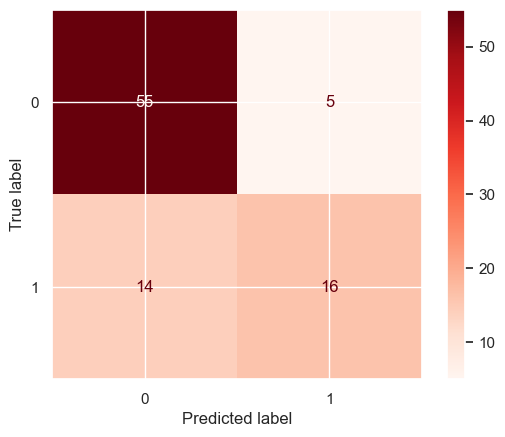

In [75]:
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final, y_test, cmap='Reds'))

# Hyperparameter Tuning Random Forest

This code creates an instance of the RandomForestClassifier class with 20 estimators (trees), using the entropy criterion for splitting nodes and a maximum depth of 500 for each tree.

In [76]:
rf_ms_1 = RandomForestClassifier(n_estimators=20,
                                 criterion='entropy',
                                 max_depth=500)
rf_ms_1.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=20)

Checking Score after using `RandomForestClassifier`, and but still our score on f1-score still overfit we can see the `f1 score` on test set we got 0.49 which mean 49% accurate.

F1 Score - Train Set  :  0.9923664122137404 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.98      0.99        66

    accuracy                           1.00       209
   macro avg       1.00      0.99      0.99       209
weighted avg       1.00      1.00      1.00       209
 

F1 Score - Test Set   :  0.49056603773584906 

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        60
           1       0.57      0.43      0.49        30

    accuracy                           0.70        90
   macro avg       0.66      0.63      0.64        90
weighted avg       0.69      0.70      0.69        90
 

Confusion Matrix      : 


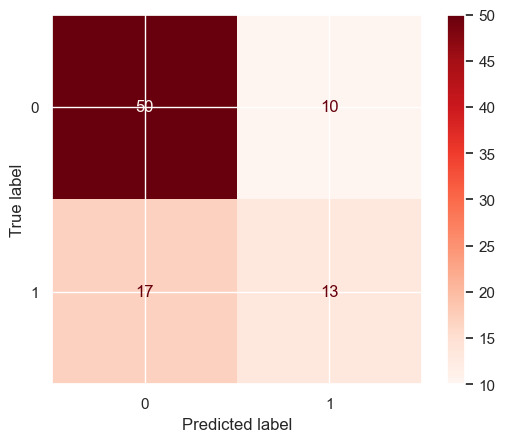

In [77]:
y_pred_test = rf_ms_1.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_final, y_test, cmap='Reds'))

# IMPROVEMENT

And now we are going to make it more improve to get the code we want, here is the code to make a random search using `random grid`

In [78]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

This code used to specify the hyperparameters and their possible values for an AdaBoostClassifier model.

In [ ]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='f1')
rf_randomcv.fit(X_train_final, y_train)

In [80]:
rf_randomcv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='f1')

And this is the last score we got, and the best we got, but still the F1 score on the training set is 0.9923, which indicates a very high accuracy on the training data. However, the F1 score on the test set is much lower, 0.6153, which indicates that the classifier is not generalizing well to unseen data.

F1 Score - Train Set  :  0.9923664122137404 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.98      0.99        66

    accuracy                           1.00       209
   macro avg       1.00      0.99      0.99       209
weighted avg       1.00      1.00      1.00       209
 

F1 Score - Test Set   :  0.6153846153846153 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        60
           1       0.73      0.53      0.62        30

    accuracy                           0.78        90
   macro avg       0.76      0.72      0.73        90
weighted avg       0.77      0.78      0.77        90
 

Confusion Matrix      : 


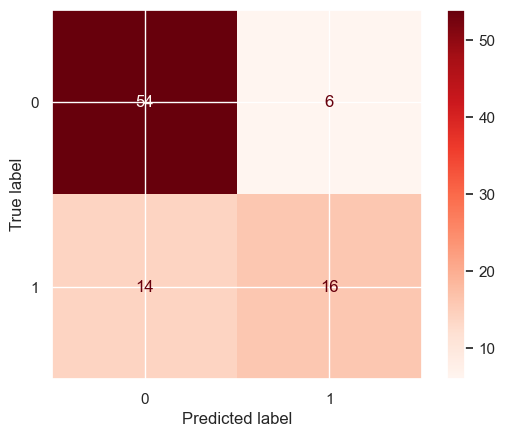

In [81]:
y_pred_test = rf_randomcv.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_test_final, y_test, cmap='Reds'))

## MODEL BOOST CROSS VALIDATION

And now we are going to make boost mode we use `Ada Boost Classifier` and `XGboost Classifier` and we find the best score between these and make it as a model.

### Model Training

In [82]:

ada_model = AdaBoostClassifier()
xg_model = xgb.XGBClassifier()


In [83]:
skfold=StratifiedKFold(n_splits=5)

Checking the best score between `Ada Boost Classifier` and `XGboost Classifier` and we got `Ada Boost Classifier`, for next step we going to make evaluation for `Ada Boost Classifier`

In [84]:
cv_scores = -1
for cv,name in zip([xg_model, ada_model],['xg_model','ada_model']):
    cv_scores_temp = cross_val_score(cv, X_train_final, y_train, cv=5, scoring="recall")
    print(name)
    print('recall - All - Cross Validation  : ', cv_scores_temp)
    print('recall - Mean - Cross Validation : ', cv_scores_temp.mean())
    print('recall - Std - Cross Validation  : ', cv_scores_temp.std())
    print('recall - Range of Test-Set       : ', (cv_scores_temp.mean()-cv_scores_temp.std()) , '-', (cv_scores_temp.mean()+cv_scores_temp.std()))
    print('-'*50)
    if cv_scores_temp.mean() > cv_scores:
        cv_scores = cv_scores_temp.mean()
        name_model = name
print('best model:', name_model)
print('cross-val mean:', cv_scores)

xg_model
recall - All - Cross Validation  :  [0.42857143 0.30769231 0.30769231 0.53846154 0.30769231]
recall - Mean - Cross Validation :  0.37802197802197807
recall - Std - Cross Validation  :  0.09288152355655135
recall - Range of Test-Set       :  0.2851404544654267 - 0.47090350157852945
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.35714286 0.38461538 0.38461538 0.53846154 0.53846154]
recall - Mean - Cross Validation :  0.4406593406593406
recall - Std - Cross Validation  :  0.08048278427956286
recall - Range of Test-Set       :  0.36017655637977775 - 0.5211421249389034
--------------------------------------------------
best model: ada_model
cross-val mean: 0.4406593406593406


# MODEL AdaBoostClassifier

# Model Training

In [85]:
ada_model.fit(X_train_final, y_train)

AdaBoostClassifier()

Checking the score on `Ada Boost Classifier`, and the result show the F1 score on the test set is lower, 0.5769, which indicates that the classifier may not be generalizing well to unseen data. This might be an indication of overfitting, where the classifier has learned to fit the training data too well and is not performing as well on unseen data.

F1 Score - Train Set  :  0.7090909090909092 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       143
           1       0.89      0.59      0.71        66

    accuracy                           0.85       209
   macro avg       0.86      0.78      0.80       209
weighted avg       0.85      0.85      0.84       209
 

F1 Score - Test Set   :  0.576923076923077 

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        60
           1       0.68      0.50      0.58        30

    accuracy                           0.76        90
   macro avg       0.73      0.69      0.70        90
weighted avg       0.75      0.76      0.74        90
 

Confusion Matrix      : 


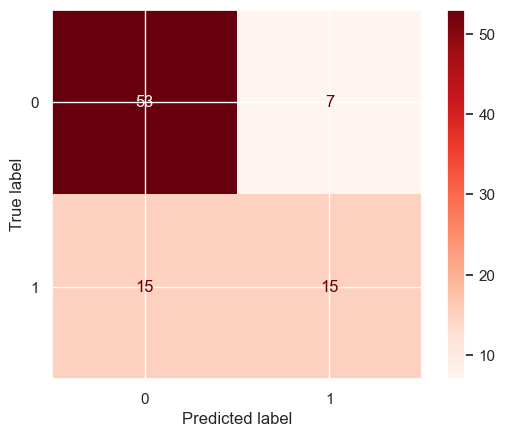

In [86]:
y_pred_train = ada_model.predict(X_train_final)
y_pred_test = ada_model.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada_model, X_test_final, y_test, cmap='Reds'))

# Hyperparameter Tuning AdaBoostClassifier

For the best score we will get, we are going to tune it more, and getting the best score.

In [87]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

This code initializes an AdaBoostClassifier object, This code initializes an AdaBoostClassifier object.

In [ ]:
clf = AdaBoostClassifier()
grid_search = GridSearchCV(clf, param_grid_ada, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

In [96]:
grid_search

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

This is the best we got, the score of training F1 score and a low test F1 score could indicate overfitting, where the classifier is performing well on the training data but not generalizing well to unseen data.

F1 Score - Train Set  :  0.5416666666666666 

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       143
           1       0.87      0.39      0.54        66

    accuracy                           0.79       209
   macro avg       0.82      0.68      0.70       209
weighted avg       0.80      0.79      0.76       209
 

F1 Score - Test Set   :  0.6037735849056605 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        60
           1       0.70      0.53      0.60        30

    accuracy                           0.77        90
   macro avg       0.74      0.71      0.72        90
weighted avg       0.76      0.77      0.76        90
 

Confusion Matrix      : 


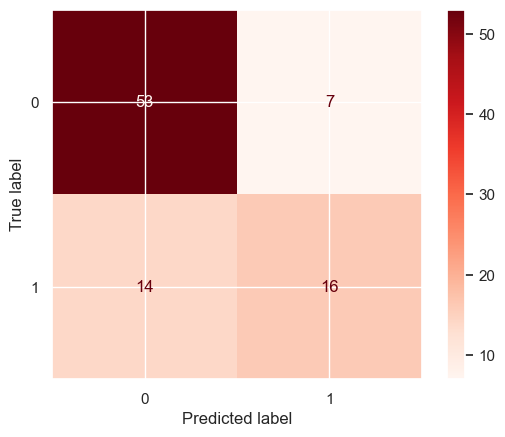

In [97]:
y_pred_train = grid_search.predict(X_train_final)
y_pred_test = grid_search.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_search, X_test_final, y_test, cmap='Reds'))

# MODEL SAVING

In [99]:
with open('model_rf_model.pkl', 'wb') as file_1:
  joblib.dump(rf_model, file_1)

with open('model_ada_model.pkl', 'wb') as file_2:
  joblib.dump(ada_model, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)

with open('list_num_cols.txt', 'wb') as file_4:
  joblib.dump(numcol, file_4)

with open('list_cat_cols.txt', 'wb') as file_5:
  joblib.dump(catcol, file_5)

# Conclusion

After predicting the death_event feature using the chosen numerical variables `age` and `creatinine_phosphokinase` as well as the categorical variables `anaemia`, `serum_creatinine`, `high_blood_pressure` and `smoking`, it can be concluded that these variables have a significant impact on the death event outcome. The age and creatinine_phosphokinase are found to be positively correlated with death event

The next step after identifying the key variables that impact the `death_event` outcome would be to use a machine learning model to make predictions. One suitable model for this task would be a `Random Forest Classifier`. This is a type of ensemble learning method that uses multiple decision trees to make predictions.

And for model, the given results suggest that the `Random Forest classifier` is overfitting the training data. The F1 score on the training set is very high, 0.9923, which indicates a very high accuracy on the training data. However, the F1 score on the test set is much lower, 0.6153, which indicates that the classifier is not generalizing well to unseen data. This is a clear indication of overfitting.

the AdaBoost classifier is not performing well on the test set, as the F1 score is 0.6037, which is not a high value. The F1 score on the training set is also relatively low, 0.5416, which indicates that the classifier is not fitting the training data very well.

# Conceptual Problems

### Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !



# ANSWARE

1. `Bagging` its a technique used in ensemble learning to improve the performance of a single model by combining the predictions of multiple models. and it works by the basic idea is to train multiple models on different subsets of the data, and then average their predictions to make the final prediction. Each subset is created by randomly sampling the original data with replacement.

    And this is much more better than use 1 sample model because, by training multiple models on different subsets of the data, we can reduce the variance of the final prediction. This is because different subsets of the data will lead to slightly different models, and averaging the predictions of these models will smooth out any fluctuations in the predictions.

    So Bagging is mainly used to reduce the variance of the final prediction, And it's particularly useful when the individual models have high variance. It's commonly used in decision tree based algorithm like Random Forest.

2. `Random Forest` is the most commonly predicted class among all the decision trees in the forest. it works by combine the predictions of multiple decision trees to make a final prediction it will be more accurate than any single decision tree. Random Forest models are versatile and can be used in a variety of fields, such as image recognition, natural language processing, and more. They are considered to be one of the most accurate and robust machine learning algorithms available.
   
   `Adaptive Boosting`, is an ensemble learning algorithm that can be used for classification problems. It works by combining multiple weak learners, such as decision trees with a small depth, to create a strong final model. It assigns a weight to each sample in the training dataset, and the weak learners are trained to give more importance to samples that were misclassified by previous weak learners. In this way, the weak learners focus on the samples that are harder to classify. Then, the weak learners' predictions are combined to make the final prediction. it's like a combination of multiple decision trees,  But unlike a Random Forest, where each decision tree is trained on a different subset of the data






